In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your JSON file
file_path = '/home/newuser/Downloads/latest/q20_result.json'
sweep_file = '/home/newuser/Downloads/latest/tpch_q20_sweep.csv'
# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

table = pd.read_csv(sweep_file,index_col=0)



In [2]:
# Step 1: Create sorted value arrays for col1 and col2
col1_name = list(data.keys())[0]  # col1name
col2_name = list(data.keys())[1]  # col2name

# Get selectivity dictionaries for col1 and col2
col1_values = data[col1_name]
col2_values = data[col2_name]


In [3]:
deviation_log = data['deviation_log']
# Prepare x, y, z arrays
x = []
y = []
z = []
for log in deviation_log:
    row1_idx, row2_idx, qerror = log
    x.append(abs(col1_values[table.loc[row1_idx, 'shipdate1']] - col1_values[table.loc[row2_idx, 'shipdate1']]))  # Selectivity for col1
    y.append(abs(col2_values[table.loc[row1_idx, 'shipdate2']] - col2_values[table.loc[row2_idx, 'shipdate2']]))  # Selectivity for col2
    z.append(qerror)                      # q-error

# Convert to numpy arrays
x = np.array(x)
y = np.array(y)
z = np.array(z)




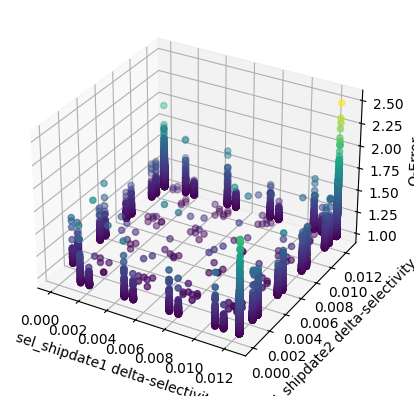

In [4]:
# Step 3: Plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

ax.set_xlabel(f'{col1_name} delta-selectivity')
ax.set_ylabel(f'{col2_name} delta-selectivity')
ax.set_zlabel('Q-Error')

plt.show()